## training a tree classifier with scikit learn

this notebook contains the code for generating the results in the tutorial:

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/machine%20learning/vertebrate.txt"
df = pd.read_csv(url, sep = "\t")
df['Class'] = df['class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')
df


,name,warm-blooded,gives birth,aquatic,aerial,has legs,hibernates,class,Class
0,human,1,1,0,0,1,1,mammals,mammals
1,python,0,0,0,0,0,0,reptiles,non-mammals
2,salmon,0,0,1,0,0,0,fishes,non-mammals
3,whale,1,1,1,0,0,0,mammals,mammals
4,frog,0,0,1,0,1,1,amphibians,non-mammals
5,komodo,0,0,0,0,1,0,reptiles,non-mammals
6,bat,1,1,0,1,1,1,mammals,mammals
7,pigeon,1,0,0,1,1,0,birds,non-mammals
8,cat,1,1,0,0,1,0,mammals,mammals
9,leopard shark,0,1,1,0,0,0,fishes,non-mammals


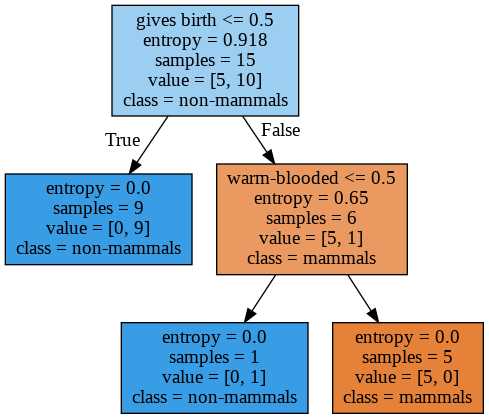

In [7]:
#fitting the model
from sklearn import tree
y = df['Class']
X = df.drop(['name','class','Class'],axis=1)
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(X, y)

#visualization
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(model, feature_names=X.columns, class_names=['mammals','non-mammals'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())


In [8]:
text_representation = tree.export_text(model)
print(text_representation) #print otherwise the format is awful


|--- feature_1 <= 0.50
|   |--- class: non-mammals
|--- feature_1 >  0.50
|   |--- feature_0 <= 0.50
|   |   |--- class: non-mammals
|   |--- feature_0 >  0.50
|   |   |--- class: mammals



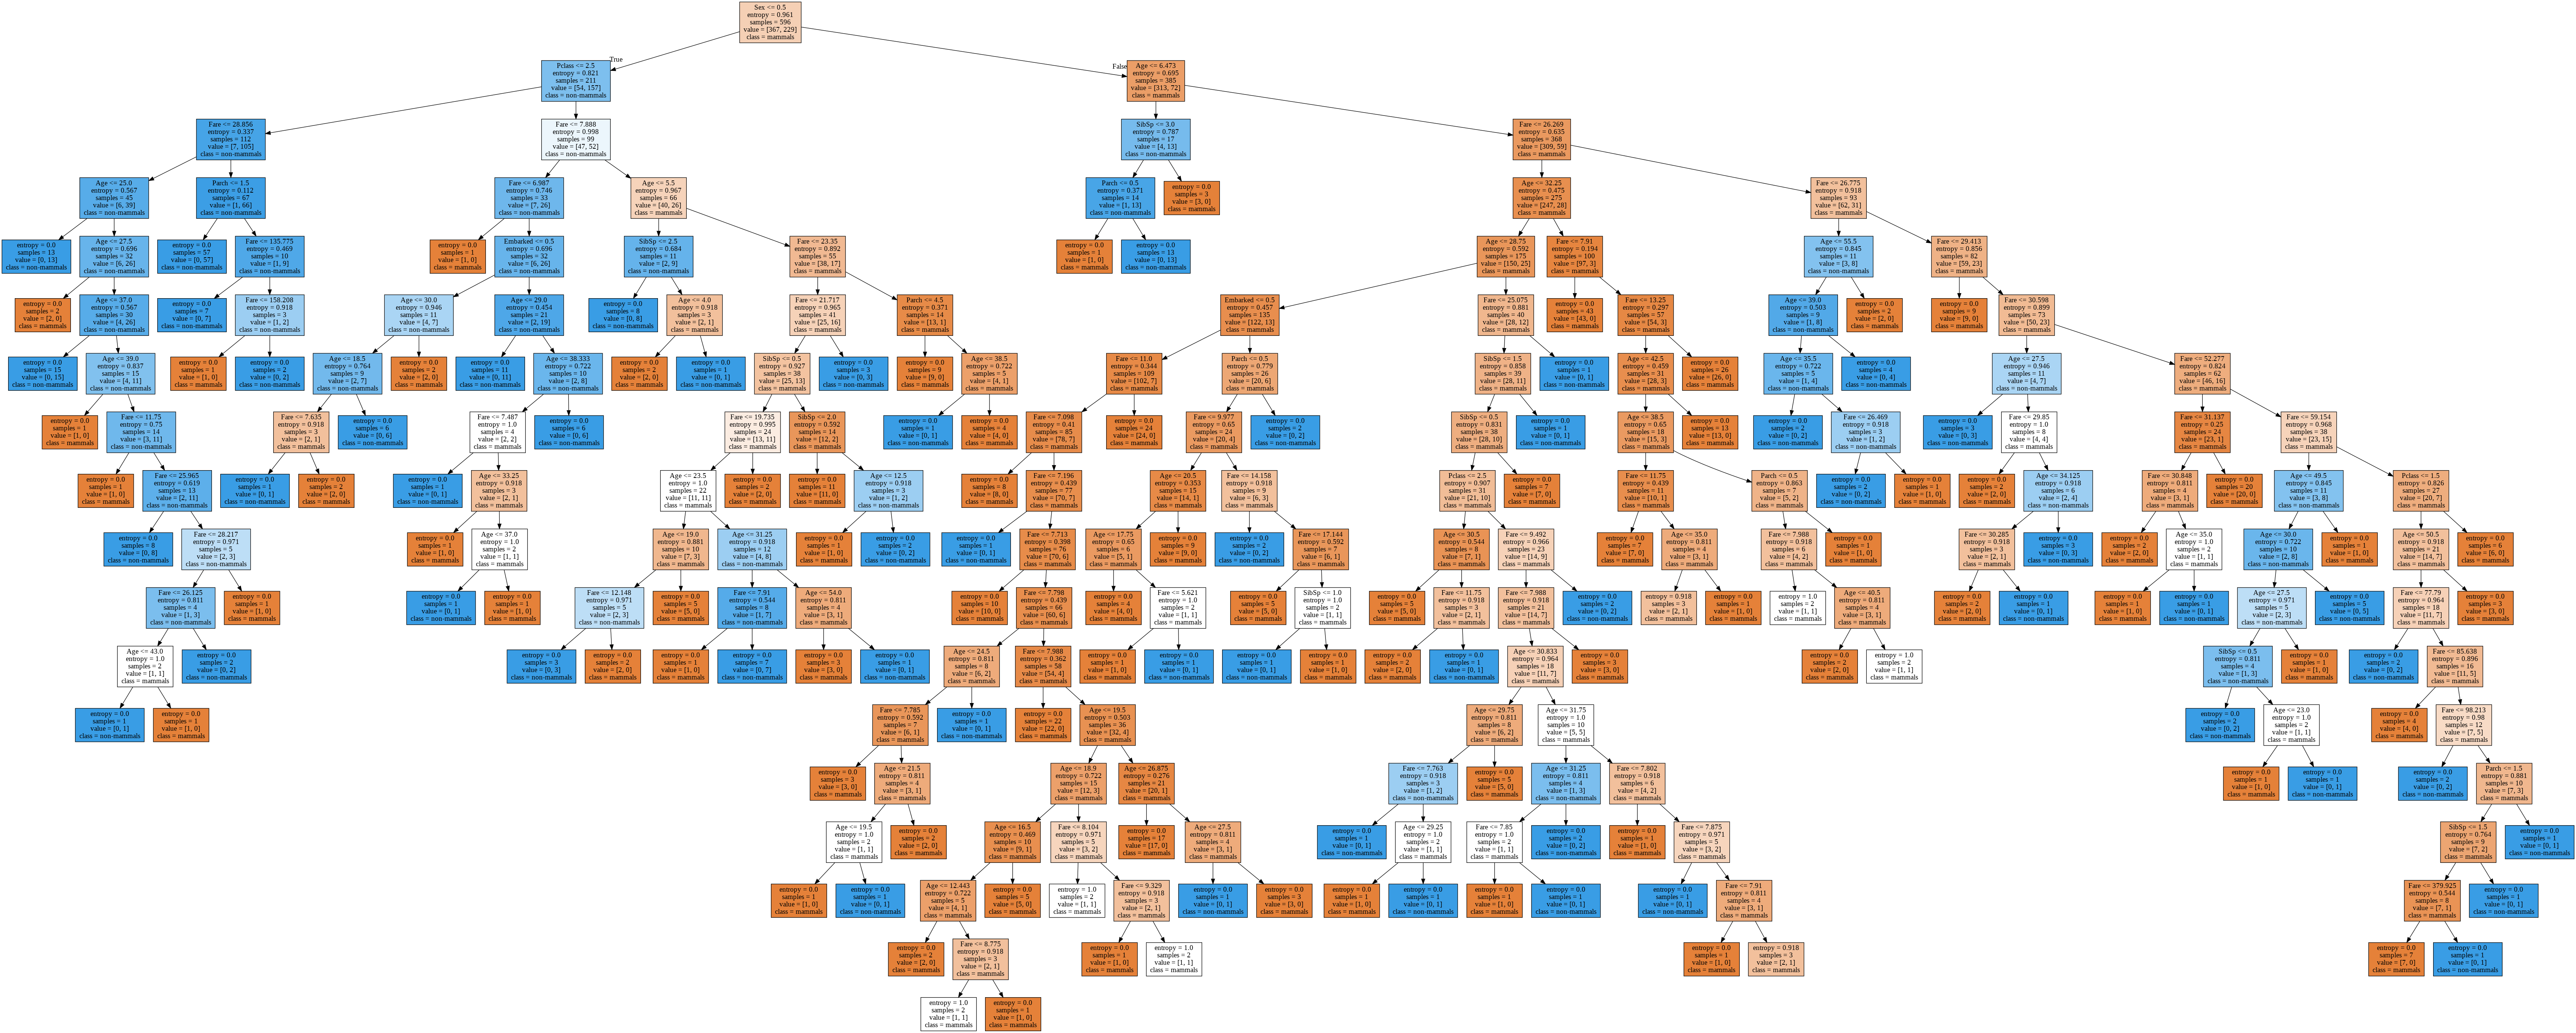

In [11]:
#scikit learn throw an error otherwise
df = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv")
df['Sex'] = df['Sex'].replace({"female" : 0, "male" : 1})
df['Embarked'] = df['Embarked'].replace({"S" :  0, "C" : 1, "Q" : 2})
df['Embarked'] = df["Embarked"].fillna(0)
df['Age'] = df["Age"].interpolate(method ='linear', limit_direction ='forward')
#select input and target
X = df.drop(["PassengerId", "Name", "Survived", "Ticket", "Cabin"], axis= 1)
y = df['Survived']

#divide in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

#train the model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

#visualize the results
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(model, feature_names=X.columns, class_names=['mammals','non-mammals'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())


The code is derived from scikit-learn, [here](https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html)

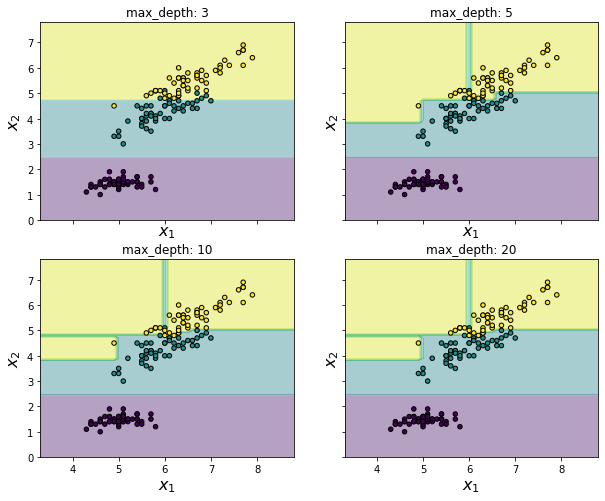

In [12]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))
for idx, i in zip(product([0, 1], [0, 1]),
                        [3, 5, 10, 20]):
  # Training classifiers
  clf = DecisionTreeClassifier(max_depth = i)
  clf.fit(X, y)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title("max_depth: {}".format(i))
  axarr[idx[0], idx[1]].set_xlabel('$x_1$', fontsize=16)
  axarr[idx[0], idx[1]].set_ylabel('$x_2$', fontsize=16)


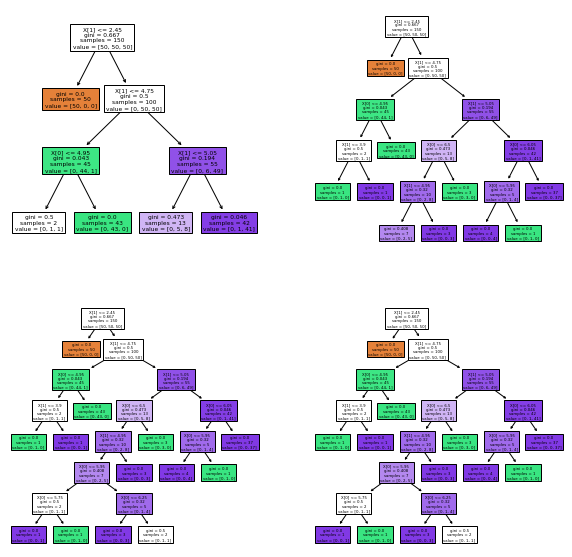

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(10, 10))
for idx, i in zip([ax1, ax2, ax3, ax4],
                        [3, 5, 10, 20]):
  # Training classifiers
  clf = DecisionTreeClassifier(max_depth = i)
  clf.fit(X, y)
  plot_tree(clf, ax = idx, filled=True)
